ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **12Oct2018**

# 08. Full-Rank Least-Squares Reaction Rates
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Full-Rank Reaction mechanism](#rxnmech)
* [Full-Rank Least-Squares Reaction Rates](#lsr)
---

## Introduction<a id="intro"></a>

Recal [notes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Evb2l8y2WNJCgNvJhcF0Pc4B-_TOOflJkiEAgCfICZwNVA?e=sV9YK0) on computational stoichiometry including an introduction to the linear, full-rank, least-squares method.

This topic is an application of the least-squares method for calculating reaction rates.
The relation between the (instantaneous) reaction rates vector, $\rvec$, and the (instantaneous) species production rates vector, $\gvec$, is given by $\transpose{\Smtrx}\,\rvec = \gvec$. Since this is often a rectangular system, it remains the problem of finding one of the infinite number of solutions when $\Smtrx$ is full rank. Specifically if $\Smtrx$ is $m \times n$ with $m$ reactions and $n$ species, then $\Smtrx^\top$ is $n\times m$, that is,
$\Smtrx^\top = 
\begin{pmatrix}
S^\top _{1,1} & S^\top _{1,2} & \dots  & S^\top _{1,m} \\
S^\top _{2,1} & S^\top _{2,2} & \dots  & S^\top _{2,m} \\
\vdots  & \vdots  & \ddots & \vdots \\
S^\top _{n,1} & S^\top _{n,2} & \dots  & S^\top _{n,m}
\end{pmatrix} 
$
where $S^\top_{i,j} = S_{j,i}$. 

The reaction rates and species production rates are related by the matrix
product
$
\begin{pmatrix}
S^\top _{1,1} & S^\top _{1,2} & \dots  & S^\top _{1,m} \\
S^\top _{2,1} & S^\top _{2,2} & \dots  & S^\top _{2,m} \\
\vdots  & \vdots  & \ddots & \vdots \\
S^\top _{n,1} & S^\top _{n,2} & \dots  & S^\top _{n,m}
\end{pmatrix} 
\,
\begin{pmatrix}
r_1 \\ 
r_2 \\ 
\vdots  \\ 
r_m \\ 
\end{pmatrix}
=
\begin{pmatrix}
g_1 \\ 
g_2 \\ 
\vdots  \\ 
g_n \\ 
\end{pmatrix}
$
which shows that each species production rate has a contribution of every reaction:

\begin{equation*}
g_j = \sum\limits_{i=1}^m S^\top _{j,i}\, r_i \qquad\  \forall \qquad\  j=1,\ldots, n.
\end{equation*}

Refer to the classroom [notes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Evb2l8y2WNJCgNvJhcF0Pc4B-_TOOflJkiEAgCfICZwNVA?e=sV9YK0) on computational stoichiometry including an introduction to the linear, full-rank, least-squares method. To compute the reaction rates vector $\rvec$ for a given species production vector $\gvec$ we need to solve:

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

There exists a **unique** least-squares solution $\rvec_\text{LS}$ to this problem if $\Smtrx$ is full rank, that is,

\begin{equation*}
 \min\limits_\rvec \norm{\gvec - \Smtrx^\top\,\rvec_\text{LS}} \quad\  \forall \quad\ \rvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\Smtrx\,\Smtrx^\top\,\rvec_\text{LS}  = \Smtrx\,\gvec ,
\end{equation*}

where $\Smtrx\,\Smtrx^\top$ is square, symmetric, and non-singular. The least-squares problem is just $\Amtrx\,\xvec=\bvec$ with
$\Amtrx = \Smtrx\,\Smtrx^\top$ and $\bvec = \Smtrx\,\gvec$. The $\Amtrx$ is called, the normal matrix.

Once the **unique** LS reaction rates $\rvec_\text{LS}$ are computed, they can be used to fit reaction rate constants $k_{\text{f}i}$ and $k_{\text{b}i}$ (forward and backward, respectively) to experimental data using the reaction rates expressions

\begin{equation*}
 r_{\text{LS}i} = k_{\text{f}i}\prod\limits_{j=1}^n\,c_j^{-S_{i,j}} - k_{\text{b}i}\prod\limits_{j=1}^n\,c_j^{S_{i,j}} 
 \quad\ \forall \quad\ i=1,\ldots,m ,
\end{equation*}

as function of the concentration of the species $c_j(t)$.

## Full-Rank reaction mechanism<a id="rxnmech"></a>
Refer to course Notebook 07.

In [1]:
'''Read a reaction mechanism and create data structures'''

# build the stoichiometric matrix
from chen_3170.toolkit import reaction_mechanism
(species, reactions, stoic_mtrx) = reaction_mechanism('data/methane-catalyst-rxn.txt')

print(species)
from chen_3170.help import print_reactions
print_reactions(reactions)

['H2(g)', 'CH(s)', 'O(s)', 'CH2(s)', 'CO(g)', 'H(s)', 'CO(s)', 'S', 'C(s)', 'CH4(g)', 'H2O(g)', 'CH3(s)']
r0 :  CO(g)+S<=>CO(s)
r1 :  CO(s)+S<=>C(s)+O(s)
r2 :  O(s)+H2(g)<=>H2O(g)+S
r3 :  H2(g)+2 S<=>2 H(s)
r4 :  C(s)+H(s)<=>CH(s)+S
r5 :  CH(s)+H(s)<=>CH2(s)+S
r6 :  CH2(s)+H(s)<=>CH3(s)+S
r7 :  CH3(s)+H(s)<=>CH4(g)+2 S
n_reactions = 8


In [2]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')
print('stoic_mtrx=\n',stoic_mtrx)

matrix shape = (8, 12)


<Figure size 2000x400 with 1 Axes>

stoic_mtrx=
 [[ 0.  0.  0.  0. -1.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1. -1.  1.  0.  0.  0.]
 [-1.  0. -1.  0.  0.  0.  0.  1.  0.  0.  1.  0.]
 [-1.  0.  0.  0.  0.  2.  0. -2.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.  1. -1.  0.  0.  0.]
 [ 0. -1.  0.  1.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0. -1.  0.  2.  0.  1.  0. -1.]]


In [3]:
'''Compute the rank of stoichiometric matrix'''

from chen_3170.toolkit import sub_mechanisms

sub_mechanisms = sub_mechanisms( species, reactions, stoic_mtrx )

assert len(sub_mechanisms) == 1

rank =  8
# of all possible sub_mechanisms = 1.0
# of full-rank sub_mechanisms = 1


## Full-rank least-squares reaction rates<a id="lsr"></a>
Refer to course Notebook 07.

In [4]:
'''Assume a species production rate as random'''

import numpy as np
g_vec = np.random.random(len(species))

Here, let's compute $\rvec_\text{LS} $ for 
$
\Smtrx\,\Smtrx^\top\,\rvec_\text{LS}   = \Smtrx\,\gvec .
$

In [5]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx @ stoic_mtrx.transpose() # A = S ST, A is the normal matrix
b_vec  = stoic_mtrx @ g_vec                  # b = S g

from chen_3170.toolkit import lu_factorization

# matrix LU factorization of A, the normal matrix
(P,L,U,s_rank) = lu_factorization( a_mtrx, 'partial' ) # matrix is full rank; partial pivoting works
assert s_rank == np.linalg.matrix_rank(stoic_mtrx)

from chen_3170.help import forward_solve
from chen_3170.toolkit import backward_solve

# solve the LS problem: A x = b
y_vec = forward_solve( L, P @ b_vec)   # L y = P b
x_vec = backward_solve( U, y_vec)      # U x = y
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

np.set_printoptions(precision=3,threshold=100,edgeitems=3)
print('species production rates g_vec =',g_vec)

r_vec = x_vec # r = x
print('reaction rates r_vec =',r_vec)
residual_vec = g_vec - stoic_mtrx.transpose() @ r_vec
print('residual norm ||g - ST r|| = %8.5e'%np.linalg.norm(residual_vec))

species production rates g_vec = [0.732 0.908 0.102 0.221 0.254 0.11  0.186 0.101 0.982 0.328 0.413 0.025]
reaction rates r_vec = [ 0.031  0.255  0.304 -0.952 -0.343 -0.827 -0.581 -0.098]
residual norm ||g - ST r|| = 1.14830e+00


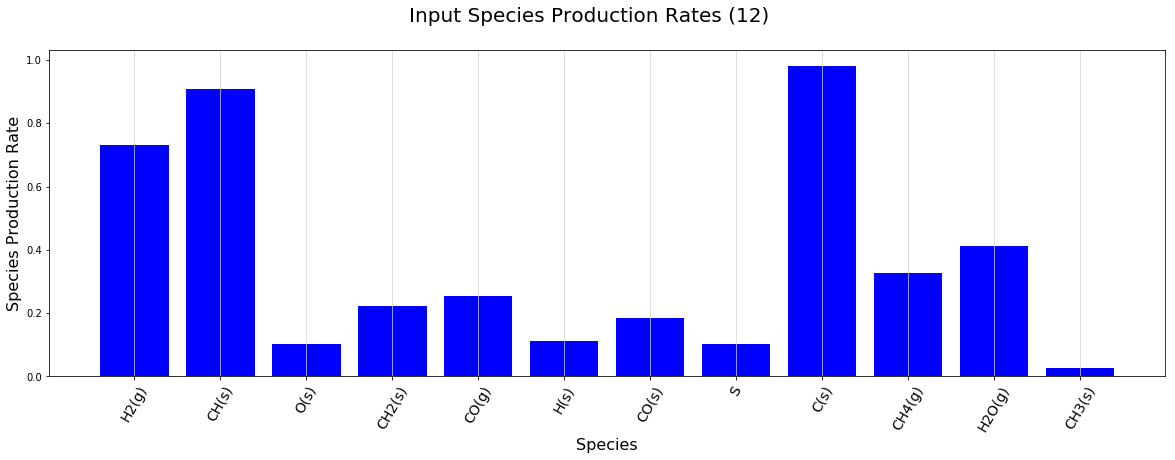

In [6]:
'''Plot of the input species production rate'''

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 4]

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(species)), g_vec, color='blue')
plt.xticks(range(len(species)),species,rotation=60,fontsize=14)
ax.set_ylabel('Species Production Rate',fontsize=16)
ax.set_xlabel('Species',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Input Species Production Rates ('+str(len(species))+')',fontsize=20)
plt.show()

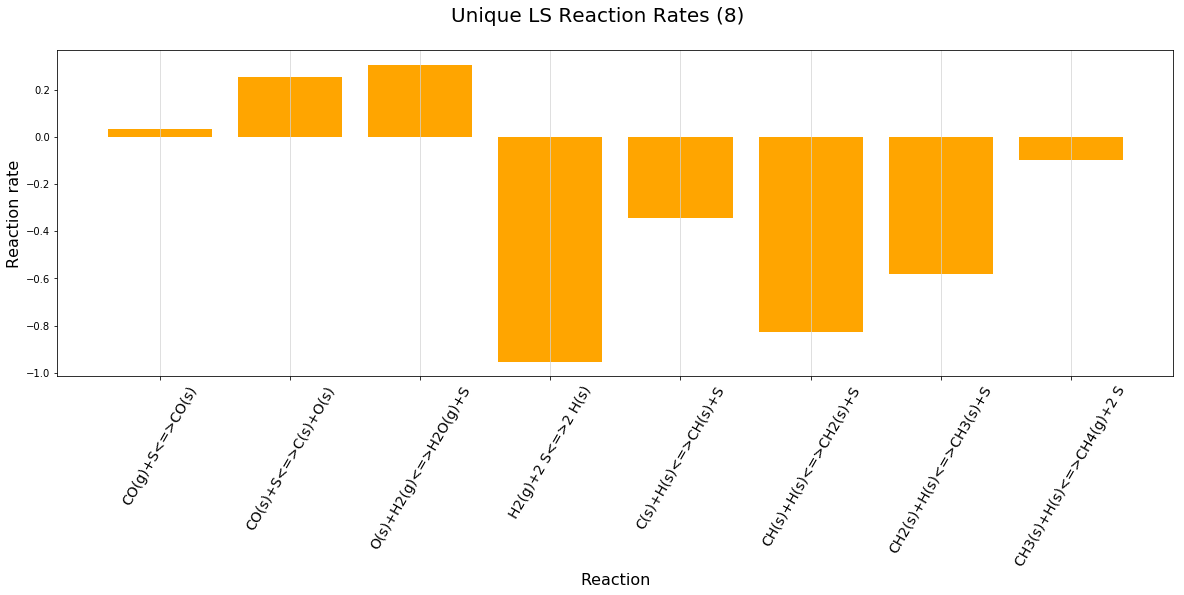

In [7]:
'''Plot least-squares reaction rates'''

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), r_vec, color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Unique LS Reaction Rates (%s)'%str(s_rank),fontsize=20)
plt.show()